In [57]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [58]:
# load the data into a dataframe and inspect a few rows
df = pd.read_csv("Absenteeism_at_work.csv" , header = 0, delimiter = ",") ## 1st row is the header and data is "comma separated"
df.sample(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
140,14,28,2,5,2,155,12,14,34,302.585,...,0,1,2,1,0,0,95,196,25,2
120,28,27,1,6,2,225,26,9,28,308.593,...,0,1,1,0,0,2,69,169,24,1
416,33,26,4,2,3,248,25,14,47,239.409,...,0,1,2,0,0,1,86,165,32,4
234,32,28,6,2,1,289,48,29,49,377.550,...,0,1,0,0,0,2,108,172,36,2
677,34,8,5,4,3,118,10,10,37,237.656,...,0,1,0,0,0,0,83,172,28,3


In [59]:
print(df.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [60]:
# cleaning column name
df.columns = df.columns.str.replace('/', 'per').str.strip()

In [61]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
ID,int64,36,0,0.0,740
Reason for absence,int64,28,0,0.0,740
Month of absence,int64,13,0,0.0,740
Day of the week,int64,5,0,0.0,740
Seasons,int64,4,0,0.0,740
Transportation expense,int64,24,0,0.0,740
Distance from Residence to Work,int64,25,0,0.0,740
Service time,int64,18,0,0.0,740
Age,int64,22,0,0.0,740
Work load Averageperday,float64,38,0,0.0,740


In [62]:
# create a dataframe of pure numeric/ selected categorical columns.

# We take ID since there are records where same employee has been absent multiple days. We will make a pivot table.

data_num = df[['ID','Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 
               'Work load Averageperday' , 'Hit target' , 'Education', 'Son', 'Pet', 'Weight', 'Height' , 
               'Body mass index',  'Absenteeism time in hours']]

data_num.sample(2)

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,Hit target,Education,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
117,28,225,26,9,28,308.593,95,1,1,2,69,169,24,2
405,1,235,11,14,37,244.387,98,3,1,1,88,172,29,0


In [63]:
# aggregate information using 'ID' as identifier. We will aggregate using median value since it is robust to outliers.
df_pivot = pd.pivot_table(data_num , values = ['Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 
               'Work load Averageperday' , 'Hit target' , 'Education', 'Son', 'Pet', 'Weight', 'Height' , 
               'Body mass index',  'Absenteeism time in hours'] , index = 'ID' , aggfunc=np.median)

print('The new DataFrame has',df_pivot.shape[0],'unique rows and',df_pivot.shape[1],'columns')

df_pivot.sample(5)

The new DataFrame has 36 unique rows and 13 columns


,Absenteeism time in hours,Age,Body mass index,Distance from Residence to Work,Education,Height,Hit target,Pet,Service time,Son,Transportation expense,Weight,Work load Averageperday
ID,,,,,,,,,,,,,
31,8.0,50,24,15,1,178,99.0,0,9,0,388,76,302.585
15,3.0,40,25,31,1,171,93.0,1,12,1,291,73,280.549
19,2.0,32,23,50,1,169,92.0,0,12,0,291,65,294.217
11,8.0,33,30,36,1,172,93.5,1,13,2,289,90,265.316
4,0.0,40,34,14,1,170,95.0,8,13,1,118,98,271.219


In [64]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Absenteeism time in hours        36 non-null     float64
 1   Age                              36 non-null     int64  
 2   Body mass index                  36 non-null     int64  
 3   Distance from Residence to Work  36 non-null     int64  
 4   Education                        36 non-null     int64  
 5   Height                           36 non-null     int64  
 6   Hit target                       36 non-null     float64
 7   Pet                              36 non-null     int64  
 8   Service time                     36 non-null     int64  
 9   Son                              36 non-null     int64  
 10  Transportation expense           36 non-null     int64  
 11  Weight                           36 non-null     int64  
 12  Work load Averageperday 

In [65]:
# scale the variables to common scale
from sklearn.preprocessing import MinMaxScaler
scld = MinMaxScaler(feature_range = (0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld , columns = df_pivot.columns)
print(df_scld.shape)
df_scld.describe().T

(36, 13)


,count,mean,std,min,25%,50%,75%,max
Absenteeism time in hours,36.0,0.564236,0.356535,0.0,0.250000,0.375000,1.000000,1.0
Age,36.0,0.365591,0.255401,0.0,0.161290,0.338710,0.516129,1.0
Body mass index,36.0,0.390351,0.247304,0.0,0.210526,0.315789,0.539474,1.0
Distance from Residence to Work,36.0,0.472222,0.308948,0.0,0.212766,0.436170,0.691489,1.0
Education,36.0,0.120370,0.253894,0.0,0.000000,0.000000,0.000000,1.0
Height,36.0,0.304714,0.191782,0.0,0.181818,0.272727,0.386364,1.0
Hit target,36.0,0.613636,0.203424,0.0,0.534091,0.636364,0.727273,1.0
Pet,36.0,0.159722,0.261539,0.0,0.000000,0.000000,0.250000,1.0
Service time,36.0,0.406746,0.189613,0.0,0.285714,0.428571,0.464286,1.0
Son,36.0,0.284722,0.254620,0.0,0.000000,0.250000,0.500000,1.0


In [66]:
# building the clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error = []
 
for num_clusters in num_of_clusters:
  clusters = KMeans(num_clusters)
  clusters.fit(df_scld)
  error.append(clusters.inertia_/100)
 
ndf = pd.DataFrame({"Cluster_Number":num_of_clusters, "Error_Term": error})
ndf

,Cluster_Number,Error_Term
0,2,0.246443
1,3,0.210963
2,4,0.188361
3,5,0.170267
4,6,0.159459
5,7,0.142412
6,8,0.135396
7,9,0.119745


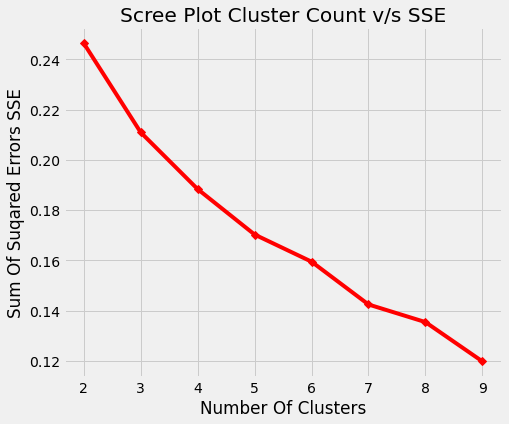

In [67]:
# plot the clusters and errors
import matplotlib.pyplot as plt
plt.figure(figsize = (7,6))
plt.plot(ndf.Cluster_Number , ndf.Error_Term , marker = "D" , color = 'red')
plt.xlabel("Number Of Clusters")
plt.ylabel("Sum Of Suqared Errors SSE")
plt.title("Scree Plot Cluster Count v/s SSE")
plt.show();

In [68]:
# build 5 clusters  
clust_final = KMeans(5)
clust_final.fit(df_scld)
clust_final.labels_

array([0, 2, 2, 2, 2, 3, 4, 2, 3, 1, 3, 1, 3, 4, 4, 3, 4, 3, 4, 1, 3, 0,
       1, 3, 0, 3, 4, 4, 0, 4, 3, 2, 2, 4, 2, 2])

In [69]:
# add the cluster labels to the original data
df_pivot['Cluster']=clust_final.labels_
print(clust_final.labels_)

[0 2 2 2 2 3 4 2 3 1 3 1 3 4 4 3 4 3 4 1 3 0 1 3 0 3 4 4 0 4 3 2 2 4 2 2]


In [70]:
# cluster profiling
cluster_profile = pd.pivot_table(df_pivot , values = ['Transportation expense' ,'Distance from Residence to Work' , 
               'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 'Education', 'Son', 'Pet', 'Weight', 
               'Height' ,'Body mass index',  'Absenteeism time in hours'] , index = 'Cluster' , aggfunc=np.median)
np.round(cluster_profile).T

Cluster,0,1,2,3,4
Absenteeism time in hours,3.0,6.0,2.0,8.0,3.0
Age,34.0,34.0,47.0,37.0,34.0
Body mass index,26.0,22.0,33.0,25.0,24.0
Distance from Residence to Work,16.0,50.0,29.0,16.0,26.0
Education,3.0,1.0,1.0,1.0,1.0
Height,175.0,173.0,170.0,174.0,170.0
Hit target,96.0,96.0,94.0,95.0,95.0
Pet,0.0,4.0,1.0,0.0,0.0
Service time,12.0,7.0,14.0,13.0,12.0
Son,0.0,2.0,1.0,2.0,1.0


In [71]:
# howmany stores per cluster
df_pivot.groupby("Cluster").size()

Cluster
0     4
1     4
2     9
3    10
4     9
dtype: int64

In [72]:
# build 4 clusters  
clust_4 = KMeans(4)
clust_4.fit(df_scld)
clust_4.labels_

array([3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 0, 2, 3, 0, 2, 0, 3, 0, 0, 3, 0,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 1, 1, 3, 1, 1])

In [73]:
# add the cluster labels to the original data
df_pivot['Cluster4']=clust_4.labels_
print(clust_4.labels_)
df_pivot.head(10).T

[3 1 1 1 1 2 3 1 2 2 2 0 2 3 0 2 0 3 0 0 3 0 2 2 3 2 0 0 3 0 2 1 1 3 1 1]


ID,1,2,3,4,5,6,7,8,9,10
Absenteeism time in hours,4.000,4.5000,3.000,0.000,8.000,8.0000,3.000,0.000,8.000,8.0000
Age,37.000,48.0000,38.000,40.000,43.000,33.0000,39.000,39.000,58.000,28.0000
Body mass index,29.000,33.0000,31.000,34.000,38.000,25.0000,24.000,35.000,22.000,27.0000
Distance from Residence to Work,11.000,29.0000,51.000,14.000,20.000,29.0000,5.000,35.000,14.000,52.0000
Education,3.000,1.0000,1.000,1.000,1.000,1.0000,1.000,1.000,1.000,1.0000
Height,172.000,163.0000,170.000,170.000,167.000,167.0000,168.000,170.000,172.000,172.0000
Hit target,95.000,92.0000,96.000,95.000,93.000,94.5000,95.000,88.000,96.500,93.0000
Pet,1.000,5.0000,0.000,8.000,0.000,2.0000,0.000,2.000,1.000,4.0000
Service time,14.000,12.0000,18.000,13.000,13.000,13.0000,14.000,14.000,16.000,3.0000
Son,1.000,1.0000,0.000,1.000,1.000,2.0000,2.000,2.000,2.000,1.0000


In [74]:
# howmany stores per cluster
df_pivot.groupby("Cluster4").size()

Cluster4
0     9
1     9
2    10
3     8
dtype: int64

In [75]:
# cluster profiling
cluster_profile_4 = pd.pivot_table(df_pivot , values = ['Transportation expense' ,'Distance from Residence to Work' , 
               'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 'Education', 'Son', 'Pet', 'Weight', 
               'Height' ,'Body mass index',  'Absenteeism time in hours'] , index = 'Cluster4' , aggfunc=np.median)
np.round(cluster_profile_4).T

Cluster4,0,1,2,3
Absenteeism time in hours,3.0,2.0,8.0,4.0
Age,31.0,47.0,38.0,36.0
Body mass index,22.0,33.0,25.0,25.0
Distance from Residence to Work,31.0,29.0,26.0,12.0
Education,1.0,1.0,1.0,2.0
Height,170.0,170.0,172.0,178.0
Hit target,95.0,94.0,95.0,96.0
Pet,0.0,1.0,1.0,0.0
Service time,9.0,14.0,13.0,12.0
Son,1.0,1.0,2.0,0.0


In [76]:
# build 3 clusters  
clust_3 = KMeans(3)
clust_3.fit(df_scld)
clust_3.labels_

array([2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0])

In [77]:
# add the cluster labels to the original data
df_pivot['Cluster3']=clust_3.labels_
print(clust_3.labels_)
df_pivot.head(5).T

[2 0 0 0 0 1 2 0 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1 2 1 2 2 2 2 1 0 0 2 0 0]


ID,1,2,3,4,5
Absenteeism time in hours,4.000,4.5000,3.000,0.000,8.000
Age,37.000,48.0000,38.000,40.000,43.000
Body mass index,29.000,33.0000,31.000,34.000,38.000
Distance from Residence to Work,11.000,29.0000,51.000,14.000,20.000
Education,3.000,1.0000,1.000,1.000,1.000
Height,172.000,163.0000,170.000,170.000,167.000
Hit target,95.000,92.0000,96.000,95.000,93.000
Pet,1.000,5.0000,0.000,8.000,0.000
Service time,14.000,12.0000,18.000,13.000,13.000
Son,1.000,1.0000,0.000,1.000,1.000


In [78]:
# howmany stores per cluster
df_pivot.groupby("Cluster3").size()

Cluster3
0     9
1    11
2    16
dtype: int64

In [79]:
# cluster profiling
cluster_profile_3 = pd.pivot_table(df_pivot , values = ['Transportation expense' ,'Distance from Residence to Work' , 
               'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 'Education', 'Son', 'Pet', 'Weight', 
               'Height' ,'Body mass index',  'Absenteeism time in hours'] , index = 'Cluster3' , aggfunc=np.median)
np.round(cluster_profile_3).T

Cluster3,0,1,2
Absenteeism time in hours,2.0,8.0,3.0
Age,47.0,36.0,32.0
Body mass index,33.0,25.0,24.0
Distance from Residence to Work,29.0,26.0,19.0
Education,1.0,1.0,2.0
Height,170.0,172.0,172.0
Hit target,94.0,95.0,95.0
Pet,1.0,1.0,0.0
Service time,14.0,13.0,10.0
Son,1.0,2.0,0.0


We Will use the cluster4 to proceed.  

**Cluster 0 : Freshers** : Less Absenteeism, Youngest group, Lives Farthest, High Schoolers, juniors, healthy, Highest workload.

**Cluster 1 : Leaders :**  Less Absenteeism, Seniors, High Schoolers, Obese(Look at the BMI & Weight 😜), Lives Far Away, Min 1 pet , Medium Workload. 

**Cluster 2 : Time-Passers :** Highest Absenteeism, Medium age, Healthy, Medium distance to work, have 2 children, Highest transportation expense, Lowest Workload.  

**Cluster 3 : Mid-Rangers :** Medium Absenteeism, Median age, Average health, Graduates, Tallest group, Highest Target achievers, medium tenure, no children, Average work load.